# PUI Fall 2017 HW 5-3
### Yuwen Chang (ywc249)
### October 2017
### Objective: investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP

# Table of Contents
<p><div class="lev1 toc-item"><a href="#Data" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></div><div class="lev1 toc-item"><a href="#Exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

# 1 Data
## 1.1 Import data

In [1]:
# Code with Python 3
# regular imports
import os
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pylab as pl;
%pylab inline

/Users/Yuwen/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Download and import data
# Data 1: The Guardian firearms murders and ownership data
# link 1: 'https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0'
link1 = 'https://raw.githubusercontent.com/ywnch/PUI2017_ywc249/master/PUIdata/firearm.csv'
os.system("curl -O " + link1)
os.system("mv firearm.csv " + os.getenv("PUIDATA"))
data1 = pd.read_csv(os.getenv("PUIDATA") + "/" + "firearm.csv")
# Extra: Try download data from Google Docs with an API

# Data 2: Number of mass shootings
# link 2: 'https://datawrapper.dwcdn.net/pvLFI/4/'
link2 = 'https://raw.githubusercontent.com/ywnch/PUI2017_ywc249/master/PUIdata/massshoot.csv'
os.system("curl -O " + link2)
os.system("mv massshoot.csv " + os.getenv("PUIDATA"))
data2 = pd.read_csv(os.getenv("PUIDATA") + "/" + "massshoot.csv")

# Data 3: The world population by country
# link 3: 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
link3 = 'https://raw.githubusercontent.com/ywnch/PUI2017_ywc249/master/PUIdata/worldpop.csv'
os.system("curl -O " + link3)
os.system("mv worldpop.csv " + os.getenv("PUIDATA"))
data3 = pd.read_csv(os.getenv("PUIDATA") + "/" + "worldpop.csv", header=2, usecols=['Country Name', '2012'])

# Data 4: The world gdp by country
# link 4: 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'
link4 = 'https://raw.githubusercontent.com/ywnch/PUI2017_ywc249/master/PUIdata/worldgdp.csv'
os.system("curl -O " + link4)
os.system("mv worldgdp.csv " + os.getenv("PUIDATA"))
data4 = pd.read_csv(os.getenv("PUIDATA") + "/" + "worldgdp.csv", header=2, usecols=['Country Name', '2012'])

In [3]:
data1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [4]:
data2.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [5]:
data3.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [6]:
# since we need information across all data for further analysis,
# merge according to the data set with least countries
print('Lengths of data sets are {}, {}, and {} respectively.'.format(len(data1), len(data2), len(data3)))

Lengths of data sets are 185, 25, and 264 respectively.


## 1.2 Merge data

In [7]:
# merge data1 to data2
data21 = pd.merge(data2, data1, left_on="Country", right_on="Country/Territory", how='left', indicator=True)
data21

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,_merge
0,Australia,15.0,4,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,both
1,Austria,30.4,1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,both
2,Beligium,17.2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,Canada,30.8,4,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,both
4,Denmark,12.0,0,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,both
5,Finland,45.3,2,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,both
6,France,31.2,6,France,FR,WHO-MDB,9.6,35.0,0.06,12.0,31.2,19000000.0,both
7,Germany,30.3,7,Germany,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0,both
8,Greece,22.5,0,Greece,GR,WHO-MDB,34.9,29.0,0.26,23.0,22.5,2500000.0,both
9,Holland,3.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [8]:
# check 'left_only' to see potential issues of not merging successfully
data21[data21._merge == 'left_only']

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,_merge
2,Beligium,17.2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,Holland,3.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,United Kingdom,6.2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [9]:
# search country using 2-digit iso code
iso = ['GB', 'UK', 'NL', 'BE']
for i in iso:
    print(data1['Country/Territory'][data1['ISO code'] == i])

Series([], Name: Country/Territory, dtype: object)
Series([], Name: Country/Territory, dtype: object)
121    Netherlands
Name: Country/Territory, dtype: object
14    Belgium
Name: Country/Territory, dtype: object


In [10]:
# United Kingdom is broken into different jurisdictions
# It is possible to join and recalculate part of the data to GB as a whole but I am dropping it
# Netherlands and Belgium have inconsistent names, causing them to be dropped from merging

# rename these two countries for consistency
data2.iloc[data2[data2['Country'] == 'Beligium'].index,0] = 'Belgium'
data2.iloc[data2[data2['Country'] == 'Holland'].index,0] = 'Netherlands'

# merge again now
data21 = pd.merge(data2, data1, left_on="Country", right_on="Country/Territory", how='left', indicator=True)

# drop UK
data21.drop(data2[data2['Country'] == 'United Kingdom'].index, inplace=True)
data21.reset_index(drop=True, inplace=True)

data21

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,_merge
0,Australia,15.0,4,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,both
1,Austria,30.4,1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,both
2,Belgium,17.2,2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,both
3,Canada,30.8,4,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,both
4,Denmark,12.0,0,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,both
5,Finland,45.3,2,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,both
6,France,31.2,6,France,FR,WHO-MDB,9.6,35.0,0.06,12.0,31.2,19000000.0,both
7,Germany,30.3,7,Germany,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0,both
8,Greece,22.5,0,Greece,GR,WHO-MDB,34.9,29.0,0.26,23.0,22.5,2500000.0,both
9,Netherlands,3.9,2,Netherlands,NL,NSO,30.7,55.0,0.33,112.0,3.9,510000.0,both


In [11]:
# merge data3
data21.drop('_merge', axis=1, inplace=True)
data213 = pd.merge(data21, data3, left_on="Country", right_on="Country Name", how='left', indicator=True)
data213

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name,2012,_merge
0,Australia,15.0,4,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,22728254.0,both
1,Austria,30.4,1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,8429991.0,both
2,Belgium,17.2,2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,Belgium,11128246.0,both
3,Canada,30.8,4,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,34750545.0,both
4,Denmark,12.0,0,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,5591572.0,both
5,Finland,45.3,2,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,5413971.0,both
6,France,31.2,6,France,FR,WHO-MDB,9.6,35.0,0.06,12.0,31.2,19000000.0,France,65659790.0,both
7,Germany,30.3,7,Germany,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0,Germany,80425823.0,both
8,Greece,22.5,0,Greece,GR,WHO-MDB,34.9,29.0,0.26,23.0,22.5,2500000.0,Greece,11045011.0,both
9,Netherlands,3.9,2,Netherlands,NL,NSO,30.7,55.0,0.33,112.0,3.9,510000.0,Netherlands,16754962.0,both


## 1.3 Clean data

In [12]:
data213.columns

Index(['Country', 'Guns/100 inhabitants', 'Number of mass shootings',
       'Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms', 'Country Name', '2012',
       '_merge'],
      dtype='object')

In [13]:
df = data213.drop(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
                   'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
                   'Average firearms per 100 people', 'Country Name', '_merge'], axis=1)

df.rename(columns={'Country':'country',
                   'Average total all civilian firearms':'arms_total',
                   '2012':'pop',
                   'Number of homicides by firearm':'arms_homi',
                   'Guns/100 inhabitants':'guns_100',
                   'Number of mass shootings':'mass_shoot'}, inplace=True)

df

,country,guns_100,mass_shoot,arms_homi,arms_total,pop
0,Australia,15.0,4,30.0,3050000.0,22728254.0
1,Austria,30.4,1,18.0,2500000.0,8429991.0
2,Belgium,17.2,2,70.0,1800000.0,11128246.0
3,Canada,30.8,4,173.0,9950000.0,34750545.0
4,Denmark,12.0,0,15.0,650000.0,5591572.0
5,Finland,45.3,2,24.0,2400000.0,5413971.0
6,France,31.2,6,35.0,19000000.0,65659790.0
7,Germany,30.3,7,158.0,25000000.0,80425823.0
8,Greece,22.5,0,29.0,2500000.0,11045011.0
9,Netherlands,3.9,2,55.0,510000.0,16754962.0


# 1.4 Add GDP data

In [14]:
df = pd.merge(df, data4, left_on="country", right_on="Country Name", how='left')
df.drop('Country Name', axis=1, inplace=True)
df.rename(columns={'2012':'gdp'}, inplace=True)
df.describe()

,guns_100,mass_shoot,arms_homi,arms_total,pop,gdp
count,24.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,2.400000e+01
mean,22.958333,4.833333,436.833333,1.502438e+07,3.753117e+07,1.706438e+12
std,19.106200,15.705625,1857.147244,5.465004e+07,6.654550e+07,3.386945e+12
min,0.600000,0.000000,0.000000,7.000000e+04,3.207160e+05,1.421858e+10
25%,9.950000,0.000000,14.000000,6.275000e+05,5.547172e+06,2.407078e+11
50%,19.850000,1.000000,32.500000,2.100000e+06,1.077993e+07,5.050246e+11
75%,30.900000,2.250000,60.250000,3.675000e+06,4.024064e+07,1.609718e+12
max,88.800000,78.000000,9146.000000,2.700000e+08,3.139984e+08,1.615526e+13


# 2 Exploration

## 2.1 Plot mass shooting vs gdp in absolute numbers, and per person

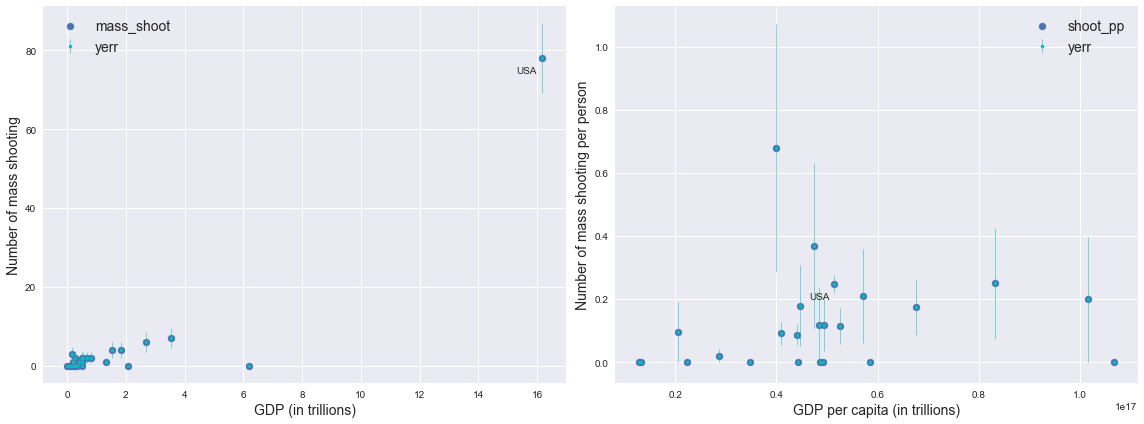

In [15]:
fig = pl.figure(figsize=(16,6))

# plot mass_shoot against gdp in absolute numbers
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(df.gdp / 1e12, df['mass_shoot'])
ax1.errorbar(df.gdp / 1e12, df['mass_shoot'], yerr=np.sqrt(df['mass_shoot']), fmt='c.', linewidth=0.5, label='yerr')
ax1.set_xlabel("GDP (in trillions)", fontsize=14)
ax1.set_ylabel("Number of mass shooting", fontsize=14)
ax1.legend(fontsize=14)
ax1.annotate('USA', xy=(df.gdp[23]/1e12, df['mass_shoot'][23]), xytext=(-25,-15), textcoords='offset points')

# plot in per person
df['gdp_pp'] = df['gdp'] / df['pop'] * 1e12 # trillion
df['shoot_pp'] = df['mass_shoot'] / df['pop'] * 1e6

ax2 = fig.add_subplot(122)
scatter = ax2.scatter(df['gdp_pp'], df['shoot_pp'])
ax2.errorbar(df['gdp_pp'], df['shoot_pp'], yerr=np.sqrt(df['mass_shoot'])/df['pop']*1e6,
             fmt='c.', linewidth=0.5, label='yerr')
ax2.set_xlabel("GDP per capita (in trillions)", fontsize=14)
ax2.set_ylabel("Number of mass shooting per person", fontsize=14)
ax2.legend(fontsize=14)
ax2.annotate('USA', xy=(df['gdp_pp'][23], df['shoot_pp'][23]), xytext=(-25,-15), textcoords='offset points')

pl.tight_layout()
pl.show()

### Fig 1. Mass shooting vs gdp in absolute numbers, and per person
In the first plot, US looks like a big outlier with high GDP and a large number of mass shootings.

When accounted with per capita, however, the gap is largely shortened and US no longer looks like an outlier.

The correlations in both graphs do not seem strong, but could potentially be a weak positive correlation.

## 2.2 Plot the average number of civilian firearms per person

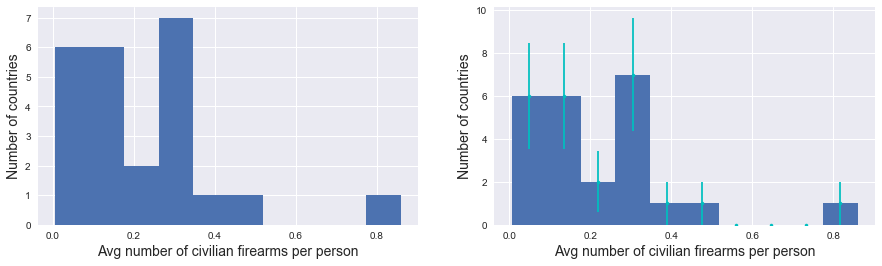

In [16]:
df['arms_pp'] = df['arms_total'] / df['pop']

fig = pl.figure(figsize=(15,4)) 

# plot w/o error bar
ax1 = fig.add_subplot(121)
hist1 = ax1.hist(df['arms_pp'])
ax1.set_xlabel("Avg number of civilian firearms per person", fontsize=14)
ax1.set_ylabel("Number of countries", fontsize=14)

# plot w/ error bar
ax2 = fig.add_subplot(122)
hist2 = ax2.hist(df['arms_pp'])

y,binEdges = np.histogram(df['arms_pp'],bins=10)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
ax2.errorbar(bincenters, y, yerr=np.sqrt(y), fmt='c.')

ax2.set_xlabel("Avg number of civilian firearms per person", fontsize=14)
ax2.set_ylabel("Number of countries", fontsize=14)

pl.show()

### Fig 2. Average number of civilian firearms per person
There is one particular country that has higher average number of firearms per person, which is the US.

In [17]:
df.iloc[23]

country       United States
guns_100               88.8
mass_shoot               78
arms_homi              9146
arms_total          2.7e+08
pop             3.13998e+08
gdp             1.61553e+13
gdp_pp          5.14501e+16
shoot_pp           0.248409
arms_pp            0.859877
Name: 23, dtype: object

## 2.3 Plot the average number of homicides by firearms per person

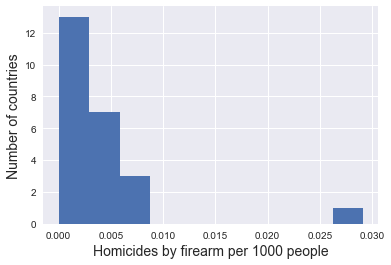

In [18]:
df['homi_pp'] = df['arms_homi'] / df['pop'] * 1e3

fig, ax = pl.subplots()
ax.hist(df['homi_pp'])
ax.set_xlabel('Homicides by firearm per 1000 people', fontsize=14)
ax.set_ylabel("Number of countries", fontsize=14);

### Fig 3. Average number of homicides by firearms per person
There is one particular country that has higher average number of homicides by firearms, which is the US.

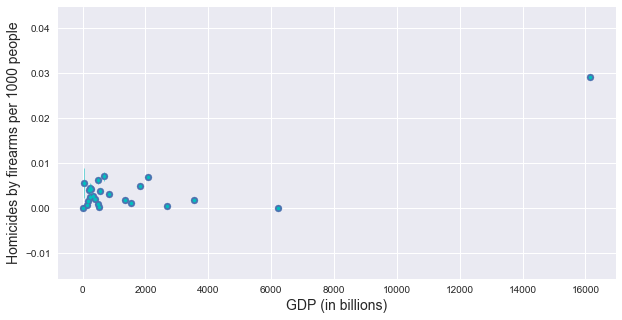

In [19]:
fig = pl.figure(figsize=(10,5)) 

ax = fig.add_subplot(111)
scatter = ax.scatter(df.gdp / 1e9, df['homi_pp'])
ax.errorbar(df.gdp / 1e9, df['homi_pp'], yerr=np.sqrt(df['arms_homi'])/df['pop']*1e3, fmt='c.', linewidth=0.5)
ax.set_xlabel("GDP (in billions)", fontsize=14)
ax.set_ylabel("Homicides by firearms per 1000 people", fontsize=14)
pl.show()

### Fig 4. Average number of homicides against gdp
There does not seem to have an obvious correlation. The outlier being the US again.

## 2.4 Plot the number of homicides by firearms against the number of civilian firearms

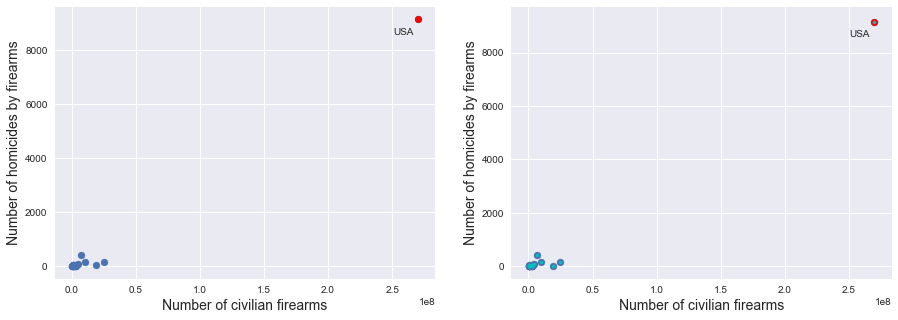

In [20]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
scatter = ax1.scatter(df['arms_total'], df['arms_homi'])
usa = ax1.plot(df['arms_total'][23], df['arms_homi'][23], 'ro')
ax1.set_xlabel("Number of civilian firearms", fontsize=14)
ax1.set_ylabel("Number of homicides by firearms", fontsize=14)
ax1.annotate('USA', xy=(df['arms_total'][23],df['arms_homi'][23]), xytext=(-25,-15), textcoords='offset points')

ax2 = fig.add_subplot(122)
scatter = ax2.scatter(df['arms_total'], df['arms_homi'])
usa = ax2.plot(df['arms_total'][23], df['arms_homi'][23], 'ro')
ax2.errorbar(df['arms_total'], df['arms_homi'], yerr = np.sqrt(df['arms_homi']), fmt = 'c.', linewidth=0.5)
ax2.set_xlabel("Number of civilian firearms", fontsize=14)
ax2.set_ylabel("Number of homicides by firearms", fontsize=14)
ax2.annotate('USA', xy=(df['arms_total'][23],df['arms_homi'][23]), xytext=(-25,-15), textcoords='offset points')
pl.show()

### Fig 5. Number of homicides by firearms against the number of civilian firearms
The US is outlier again. Since the US is stretching the plots, the errorbars are too small to observe.

It is not easy to examine potential correlations, either.

## 2.5 Plot the number of mass shootings against the number of civilian firearms

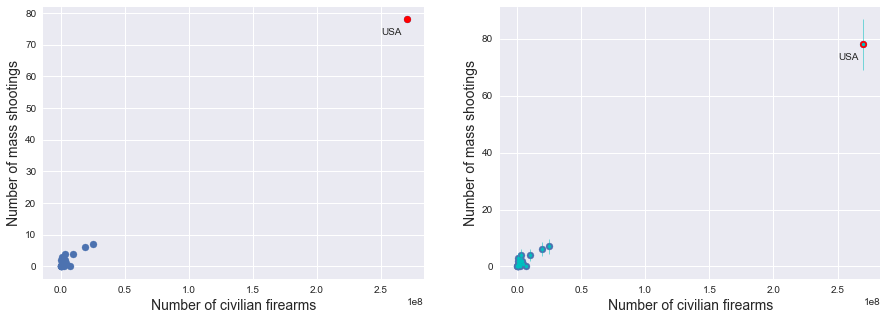

In [21]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
scatter = ax1.scatter(df['arms_total'], df['mass_shoot'])
usa = ax1.plot(df['arms_total'][23], df['mass_shoot'][23], 'ro')
ax1.set_xlabel("Number of civilian firearms", fontsize=14)
ax1.set_ylabel("Number of mass shootings", fontsize=14)
ax1.annotate('USA', xy=(df['arms_total'][23],df['mass_shoot'][23]), xytext=(-25,-15), textcoords='offset points')

ax2 = fig.add_subplot(122)
scatter = ax2.scatter(df['arms_total'], df['mass_shoot'])
usa = ax2.plot(df['arms_total'][23], df['mass_shoot'][23], 'ro')
ax2.errorbar(df['arms_total'], df['mass_shoot'], yerr = np.sqrt(df['mass_shoot']), fmt = 'c.', linewidth=0.5)
ax2.set_xlabel("Number of civilian firearms", fontsize=14)
ax2.set_ylabel("Number of mass shootings", fontsize=14)
ax2.annotate('USA', xy=(df['arms_total'][23],df['mass_shoot'][23]), xytext=(-25,-15), textcoords='offset points')
pl.show()

### Fig 6. Number of mass shootings against the number of civilian firearms
The US is outlier again, with a long errorbar. There could potentially be a positive correlation between mass shooting and the amount of civilian firearms.

# 3 Modeling

## 3.1 Fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person

In [22]:
# check magnitude
print('Means:\narms per person: %.2f\nmass shoot per million people: %.2f'\
      %(df['arms_pp'].mean(), df['shoot_pp'].mean()))

Means:
arms per person: 0.22
mass shoot per million people: 0.12


### 3.1.1 OLS

In [23]:
lm1 = smf.ols(formula='shoot_pp ~ arms_pp', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               shoot_pp   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     4.951
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0366
Time:                        22:51:51   Log-Likelihood:                 13.209
No. Observations:                  24   AIC:                            -22.42
Df Residuals:                      22   BIC:                            -20.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0435      0.047      0.933      0.361      -0.053       0.140
arms_pp        0.3667      0.165      2.225      0.037       0.025       0.709
==============================================================================
Omnibus:                       34.742   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.222
Skew:                           2.632   Prob(JB):                     9.42e-21
Kurtosis:                      11.032   Cond. No.                         5.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference
The coefficient of firearms per person is significant.

The inference is that each increase of 10 firearms per person is predicting roughly 3 to 4 mass shootings per million people in average.

### 3.1.2 WLS
I set those with no mass shootings to weigh normally (1). Since there is no data, it is difficult to tell whether these countries should weigh more or less. So I adopt the default weight (1) as in OLS.

In [24]:
yerror = np.sqrt(df['mass_shoot']) / df['pop'] * 1e6

# the WLS function automatically sqrt on the weight denominator (1/sqrt(w))
# I want to set it off by squaring the error term in advance
wt = list(1.0 / yerror ** 2)
wt = [1 if x == inf else x for x in wt] # modify the weight for zeros to ones

lm2 = smf.wls(formula='shoot_pp ~ arms_pp', data=df, weights=wt).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               shoot_pp   R-squared:                       0.783
Model:                            WLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     79.41
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           9.41e-09
Time:                        22:51:51   Log-Likelihood:                 12.055
No. Observations:                  24   AIC:                            -20.11
Df Residuals:                      22   BIC:                            -17.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0173      0.013      1.299      0.207      -0.010       0.045
arms_pp        0.2716      0.030      8.911      0.000       0.208       0.335
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.393
Skew:                           0.304   Prob(JB):                        0.821
Kurtosis:                       2.846   Cond. No.                         3.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference
The coefficient of firearms per person is smaller but even more significant after accounting for weights.

The adjusted $R^2$ also rise from 0.147 to 0.773, meaning that this could be a better model in predicting their relationship.

The inference is that each increase of 10 firearms per person is predicting roughly 2 to 3 mass shootings per million people in average.

### 3.1.3 Seaborn plot

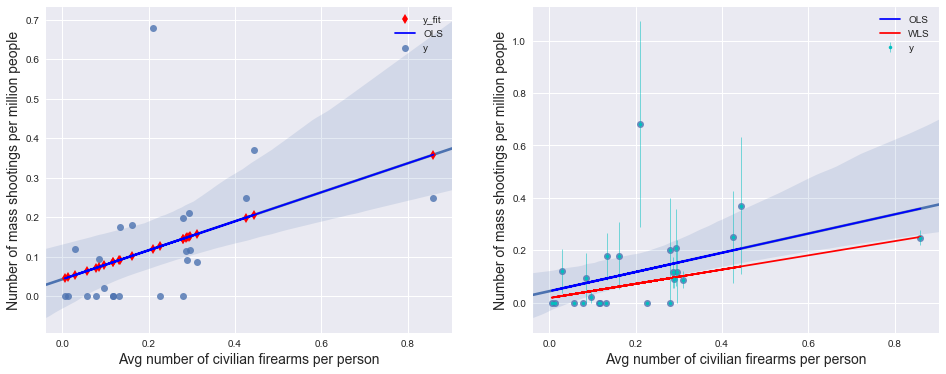

In [25]:
y_fit1 = lm1.fittedvalues
y_fit2 = lm2.fittedvalues

# plot OLS regression with fitted values
fig = pl.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121)
ax1 = sns.regplot(x='arms_pp', y='shoot_pp', data=df, label='y')
ax1.plot(df['arms_pp'], y_fit1, 'rd', label='y_fit')
ax1.plot(df['arms_pp'], y_fit1, 'b-', label='OLS')   # OLS

ax1.set_xlabel('Avg number of civilian firearms per person', fontsize=14)
ax1.set_ylabel('Number of mass shootings per million people', fontsize=14)
ax1.legend()

# plot both regression models with error bar
ax2 = fig.add_subplot(122)
ax2 = sns.regplot(x='arms_pp', y='shoot_pp', data=df)
ax2.errorbar(df['arms_pp'], df['shoot_pp'], yerr=np.sqrt(df['mass_shoot'])/df['pop']*1e6, fmt='c.', linewidth=0.5, label='y')
ax2.plot(df['arms_pp'], y_fit1, 'b-', label='OLS')   # OLS
ax2.plot(df['arms_pp'], y_fit2, 'r-', label='WLS')   # WLS

ax2.set_xlabel('Avg number of civilian firearms per person', fontsize=14)
ax2.set_ylabel('Number of mass shootings per million people', fontsize=14)
ax2.legend();

### Fig 7. Scatterplots with fitted value and different linear models
The first graph shows OLS and its fitted values.
The second graph shows both OLS and WLS models and errorbars. The slope of WLS model tends to be weighted down by US on the right end.

### 3.1.4 Polyfit

In [26]:
# apply polyfit for a quadratic model
np.polyfit(df['arms_pp'], df['shoot_pp'], 2)

array([-0.56328344,  0.79133079, -0.00392357])

In [27]:
# cross-valid by conducting an OLS using the squared regressor
df['arms_pp_sq'] = df['arms_pp'] ** 2
lm3 = smf.ols(formula='shoot_pp ~ arms_pp + arms_pp_sq', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               shoot_pp   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.071
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0676
Time:                        22:51:53   Log-Likelihood:                 13.853
No. Observations:                  24   AIC:                            -21.71
Df Residuals:                      21   BIC:                            -18.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0039      0.064     -0.061      0.952      -0.137       0.129
arms_pp        0.7913      0.428      1.851      0.078      -0.098       1.681
arms_pp_sq    -0.5633      0.524     -1.075      0.294      -1.653       0.526
==============================================================================
Omnibus:                       33.674   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.301
Skew:                           2.527   Prob(JB):                     6.69e-20
Kurtosis:                      10.922   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference
The coefficient is larger but no longer significant. There may not exist a quadratic relationship.

## 3.2 Extra credit: calculate the confidence interval by hand and also plot them

1) Confidence intervals for the parameters slope and intercept

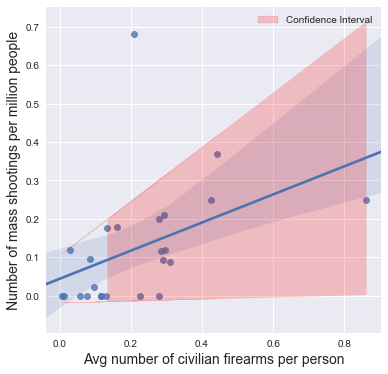

In [28]:
# calculate CI
n = len(df)
y_fit = lm1.fittedvalues
sigma = np.sqrt(sum((df['shoot_pp'] - y_fit) ** 2) / n)
tp = sp.stats.t.ppf(0.975, n-2)
ci_a = tp * np.sqrt(sigma ** 2 / (n - 2)) # intercept
ci_b = tp * (np.sqrt(n) * sigma) / np.sqrt((n - 2) * (sum((df['arms_pp'] - df['arms_pp'].mean()) ** 2))) # slope

# create upper and lower boundaries of CI: y = ax + b
upper = lm1.params[0] + ci_a + df['arms_pp'] * (lm1.params[1] + ci_b)
lower = lm1.params[0] - ci_a + df['arms_pp'] * (lm1.params[1] - ci_b)

# plot CI
pl.figure(figsize=(6, 6))
sns.regplot(x='arms_pp', y='shoot_pp', data=df)
pl.xlabel('Avg number of civilian firearms per person', fontsize=14)
pl.ylabel('Number of mass shootings per million people', fontsize=14);
pl.fill_between(df['arms_pp'], lower, upper, color='r', alpha=0.2, label='Confidence Interval');
pl.legend()
pl.show();

## 3.3 Use the stsatsmodels.gaphics package to plot the influence plot

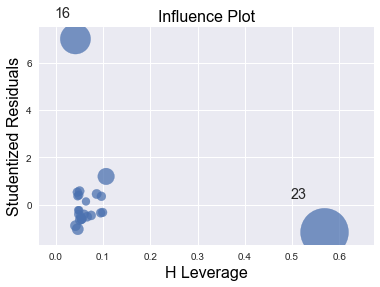

In [29]:
sm.graphics.influence_plot(lm1, alpha=0.05, criterion="cooks");

In [30]:
# extract countries with high influences
df.iloc[[16, 23]]

,country,guns_100,mass_shoot,arms_homi,arms_total,pop,gdp,gdp_pp,shoot_pp,arms_pp,homi_pp,arms_pp_sq
16,New Zealand,22.6,3,7.0,925000.0,4408100.0,1.761929e+11,3.997026e+16,0.680565,0.209841,0.001588,0.044033
23,United States,88.8,78,9146.0,270000000.0,313998379.0,1.615526e+13,5.145012e+16,0.248409,0.859877,0.029128,0.739389


### Inference
The influence plot demonstrates two data point with high outlyingness. Below is the meanings of the plot:
- x-axis: leverage on the horizontal axis
- y-axis: residual on the vertical axis
- point size: square root of Cook's D statistic, a measure of the influence

New Zealand (NZ) and United States (US) both have large potential of inluence on the model, as shown by circle size. However, NZ has little leverage power although it has great residual. US, in contrast, has similar residual but great leverage power, due to its position on the far end from other data points.

In other words, NZ is an outlier with little leverage, which will not alter the model (slope, coefficient) drastically. US, could tilt the model if its residual grows large.

## 3.4 Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## 3.5 Discuss your findings

The best model in terms of $R^2$ is the WLS linear model (0.783).

The coefficient of firearms per person is small (0.27) but significant (p-value = 0.00).

The statistical inference derived from this model is that each increase of 10 firearms per person is predicting roughly 2 to 3 mass shootings per million people in average.

However, since (10 * population) of firearms is an enormous amount, perhaps we may also argue that possession of firearms per capita may not be a very effective predictor in terms of mass shootings in the real world setting.